<a href="https://colab.research.google.com/github/Rinniedh/Python_practice/blob/main/Lab_Assignment_02_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TBANLT 570 - Lab Assignment 02 - Processing Letters & Words and Comparing Documents Using Word Frequencies!
This lab assignment will introduce you to some of the techniques that we can use to work with letters and words in Python. These techniques provide the foundation for many text mining tasks.

###Learning Objectives
By the time you finish this lab assignment, you will know:
1. How to load data from a SQLite database into a Pandas dataframe.
2. How to perform basic text cleaning on documents in order to prepare those documents for analysis.
3. How to compute raw letter frequencies and letter probability distributions for a corpus of documents.
4. How to generate a complete vocabulary for a corpus of documents.
5. How to compute raw word frequencies and unigram (word) probability distributions for a corpus of documents.
6. How to compare and identify similar documents by using their unigram probability distributions.

### Import Libraries
Python has a small core set of capabilities with a very large set of libraries. This allows us to import specialized functionality into our programs on an as-needed basis.

Run the code cell below to import all of the libraries that we'll need for this lab assignment.

In [1]:
#import libraries
import numpy as np #used to quickly perform mathematical calculations on vectors
import pandas as pd #allows us to work with data using Pandas dataframes
import re #regular expressions -- used in this assignment to clean the text data
import sqlite3 #used to interact with the database
from collections import Counter #used to quickly count letters and words

### Load Data
The data for this assignment are a collection of documents written in a variety of languages. These documents have been provided to you on the course website in the form of a SQLite database. SQLite is the world's most widely used relational database. It is also the native database environment in Python. If you like, you may learn more about SQLite by [visiting this page](https://sqlite.org/index.html).

Before continuing, be sure to upload the `Lab Assignment 02 - Database.db` database file to your Colab notebook's session storage by clicking on the folder icon on the left side of your screen, and then selecting the *Upload to session storage* button.

After you have uploaded the database file, run the code cell below to load all of the documents from the database into a Pandas dataframe. Pandas is the most commonly used Python data analysis and manipulation library. You may learn more about Pandas by reading [this article](https://en.wikipedia.org/wiki/Pandas_(software)).

In [2]:
#open a connection to the database
conn = sqlite3.connect('Lab Assignment 02 - Database.db')

#load all documents into a Pandas dataframe named 'df', and use the 'document_id' column as the index.
#the index is used as a basis for uniquely identifying each row of data in the dataframe.
sql = 'SELECT * FROM Document'
df = pd.read_sql_query(sql, conn, index_col='document_id')

#close database connection
conn.close()

### Preview Data
It's always a good idea to familiarize yourself with your dataset before you begin any data analysis project.

**TASK 01**:
>Write a line of code in the cell below that will display the first 10 rows of data in the `df` dataframe. *Hint*: read about the dataframe's [`head()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).


**QUESTION 01**:
>What is the topic of the document whose `document_id` is equal to 10?

In [14]:
#show the first 10 rows of data
df.head(36)



## Answer: Business

,language,topic,raw_text
document_id,,,
1,French,Health,Vaccin AstraZeneca : l’existence d’un risque «...
2,English,Sports,Throughout the four-plus years coach Kyle Shan...
3,German,Sports,DFB-Aktion zu Menschenrechten: Mehr als nur ei...
4,English,Sports,Major League Baseball is raising the minimum s...
5,English,Business,The stranded Ever Given mega-container ship in...
6,French,Africa,Ce que l’on sait de l’incident au canal de Sue...
7,French,Economy,"D’habitude feutrées, les allées du palais d’Ié..."
8,English,Science,The US space agency says it expects now to fly...
9,German,Culture,Live-Kunst in Pandemie-Zeiten: ein Modellproje...


**TASK 02**:
>Write a line of code that will display the languages and topics that are represented in the data, as well as the number of documents for each combination of language and topic. *Hint*: read about the [Pandas crosstab function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).

**QUESTION 02**:
>How many German-language articles have `Economy` as their topic?

In [18]:
#display the languages and topics that are represented in the data, as well as how many
#articles there are for each combination of language and topic

# Group the data by language and topic, then count the number of articles for each group
article_counts = df.groupby(['language', 'topic']).size().reset_index(name='count')

# Display the result
print(article_counts)

## Answer: 2


   language     topic  count
0   English  Business      6
1   English   Science      7
2   English    Sports      6
3   English   Unknown      7
4    French    Africa      1
5    French   Economy      2
6    French    Health      1
7    French   Science      1
8    German   Culture      2
9    German   Economy      2
10   German    Sports      1


### Split Data by Language
Next, let's split our dataset into three different dataframes, with each dataframe holding all of the documents for just one language. This will be useful later in the lab assignment when we are working only with English-language documents.

Run the code cell below to split the dataset by language. For each line of code below, any rows in our `df` dataframe that satisfy the condition inside the square brackets will be included in the corresponding language-specific dataframe.

In [19]:
#split the dataset into three different dataframes, with one dataframe per language
df_english = df[df.language == 'English'].copy()
df_french = df[df.language == 'French'].copy()
df_german = df[df.language == 'German'].copy()

### Prepare Data for Analysis
Natural language text often contains many punctuation symbols or special characters that can interfere with our ability to analyze the letters or words that comprise the actual message. For this reason, it is often (but not always) a good idea to remove these symbols or special characters. Similarly, since we will be counting letters and words in this lab assignment, we may want to convert all of the text to lower case. Otherwise, our program will think that a capitalized word is entirely different from a lowercase version of the same word. Note that simply converting all of the text to lower case will introduce some error into our data because humans like to use acronyms (e.g., `IT` vs. `it`). We will work on resolving this acronym issue in a future lab assignment.

Run the code cell below to define a function that will clean the input text, and then use that function to clean all of the articles in the three language-specific dataframes.

In [20]:
#define a function that will clean the raw input text in preparation for analysis.
#the name of our function is 'clean_text'. It has one parameter (raw_text) which will
#hold the text that we want to clean.
def clean_text(raw_text):
  #convert the raw text to lowercase
  text = raw_text.lower()
  #remove all numbers from the text using a regular expression
  text = re.sub(r'[0-9]', ' ', text)
  #remove all underscores from the text
  text = re.sub(r'\_', ' ', text)
  #remove anything else in the text that isn't a word character (letter) or a space (e.g., punctuation, special symbols, etc.)
  text = re.sub(r'[^\w\s]', ' ', text)
  #remove any excess whitespace
  for _ in range(10): text = text.replace('  ', ' ')
  #remove any leading or trailing space characters
  text = text.strip()
  #return the clean text
  return text


#clean the raw text of each document and store the resulting clean text in a new column
#in each dataframe. The code below uses a Python feature known as 'list comprehension'
#to quickly handle this task. The code on the right side of the equals sign returns a
#list, and that list is then used to create a new column in one of the language-specific
#dataframes.
df_english['clean_text'] = [clean_text(raw_text) for raw_text in df_english.raw_text]
df_french['clean_text'] = [clean_text(raw_text) for raw_text in df_french.raw_text]
df_german['clean_text'] = [clean_text(raw_text) for raw_text in df_german.raw_text]

#show the cleaned text of the first English-language document
df_english.iloc[0].clean_text

'throughout the four plus years coach kyle shanahan and general manager john lynch have been in charge of the san francisco ers their quarterback plan has constantly evolved in they didn t use the no overall pick to take one of that draft s top quarterbacks because they had their eye on kirk cousins in free agency the following spring by halloween of that year the new england patriots offered jimmy garoppolo for a second round pick garoppolo did enough to change their minds and landed a massive contract before cousins hit the market it was a bold move but not nearly as bold as what they did friday agreeing to send the no overall pick this year first and third round choices and a first round selection to the miami dolphins for the no overall pick it s just the fourth time in the past drafts that a team has traded from th overall or later into the top three it s the highest pick the niners have acquired in a trade during the common draft era according to espn stats information a source t

### Compute Raw Letter Frequencies for Each Language
The frequency with which each letter is used varies substantially from language to language, and this fact is very useful in fields such as file compression and cryptography (code breaking).

**TASK 03**:
>Run the code cell below to count how many times each letter is used in the documents for each language, and then write a line of code that will display the letter frequencies for the German-language documents.

**QUESTION 03**:
>What is the second-most frequently used letter in the German-language documents?

In [28]:
#define a function that will compute the raw letter frequencies for the input texts,
#as well as the total number of letters appearing in the input texts
def letter_counts(input_texts):
  all_text = ' '.join(input_texts) #join all of the input texts into one big string
  letter_counts = Counter(all_text.replace(' ', '')) #count all letters in the text (excluding spaces)
  #return letter counts (sorted from most common to least common),
  #and the total number of letters. Note that we're returning two different values -- the first value
  #is a list containing the letters and their raw frequencies, while the second value is the total
  #number of letters appearing in all of input texts.
  return letter_counts.most_common(), sum(letter_counts.values())


#use our new 'letter_counts()' function to get letter counts for each language
english_letter_counts, total_english_letters = letter_counts(df_english.clean_text)
french_letter_counts, total_french_letters = letter_counts(df_french.clean_text)
german_letter_counts, total_german_letters = letter_counts(df_german.clean_text)

print(german_letter_counts)




[('e', 3339), ('n', 2253), ('i', 1863), ('r', 1602), ('a', 1366), ('t', 1335), ('s', 1267), ('d', 1010), ('h', 899), ('l', 840), ('u', 773), ('o', 683), ('c', 647), ('g', 608), ('m', 584), ('b', 399), ('f', 345), ('w', 313), ('k', 302), ('z', 277), ('p', 230), ('v', 209), ('ü', 125), ('ä', 91), ('j', 67), ('ß', 42), ('ö', 40), ('y', 33), ('x', 18), ('q', 5), ('é', 2), ('á', 2), ('ó', 1)]


In [29]:
second_most_common_letter = german_letter_counts[1][0]
print("The second-most frequently used letter in the German-language documents is:", second_most_common_letter)



The second-most frequently used letter in the German-language documents is: n


### Compute Standardized Letter Frequencies (i.e., Letter Probability Distributions) for Each Language
Working with raw letter frequencies has some value, but if we want to be able to effectively compare letter usage among languages, we need to standardize the frequencies into probabilities (or equivalently, into percentages). We can do this by dividing each letter's raw frequency count by the total number of letters appearing in the corpus of documents for a given language.

**TASK 04**:
>Run the code cell below to compute the letter probability distributions for each language, and then write a line of code that will display the letter probabilities for the French-language documents.

**QUESTION 04**:
>What is the probability for the letter `e` among all of the French-language documents? Report your answer using three decimals of precision (e.g., 0.096).

In [35]:
#get letter probabilities for each language
english_letter_probabilities = [(letter, n / total_english_letters) for letter, n in english_letter_counts]
french_letter_probabilities = [(letter, n / total_french_letters) for letter, n in french_letter_counts]
german_letter_probabilities = [(letter, n / total_german_letters) for letter, n in german_letter_counts]

print(french_letter_probabilities)

[('e', 0.14189374417457098), ('s', 0.0836668677010801), ('a', 0.07780031799989034), ('n', 0.07582652557706014), ('i', 0.0713854926256922), ('t', 0.06836997642414606), ('r', 0.0674379077800318), ('u', 0.05680135972366906), ('o', 0.05449860189703383), ('l', 0.05236032677230111), ('d', 0.043533088436866055), ('c', 0.03826964197598553), ('p', 0.028674817698338725), ('é', 0.027523438785021108), ('m', 0.025165853391085038), ('v', 0.016009649651844947), ('g', 0.011294478863972805), ('q', 0.01008827238335435), ('b', 0.009704479412248479), ('f', 0.00921103130654093), ('h', 0.0062503426722956305), ('à', 0.0047699983551729806), ('j', 0.0038379297110587205), ('x', 0.0037282745764570424), ('y', 0.003289654038050332), ('è', 0.002851033499643621), ('z', 0.0020834475574318767), ('ê', 0.0008772410768134218), ('k', 0.0007675859422117441), ('â', 0.00032896540380503316), ('ç', 0.00032896540380503316), ('ô', 0.0002741378365041943), ('û', 0.00021931026920335545), ('œ', 0.00021931026920335545), ('ù', 0.00021

In [39]:
#display letter probabilities for all of the French-language documents

v = french_letter_probabilities[0][1]
print("The probability for the letter e among all of the French-language documents is:", round(v,3))



The probability for the letter e in among all of the French-language documents is: 0.142


###A Brief Note Before We Continue...
From this point forward we'll only be focusing on the English-language documents. Nevertheless, it's important to understand that all of the techniques used in the remainder of this lab assignment could also be applied to the French-language or German-language documents (as well as documents written in many other languages).

###Build a Vocabulary
Our next task will be to build a vocabulary for our English-language corpus. In Natural Language Processing (NLP), a ***vocabulary*** is a collection of unique lexical units appearing in a corpus. Importantly, what constitutes a "lexical unit" can vary from project to project. For our current lab assignment, we will adopt the simplest approach and use the collection of unique ***words*** as the lexical units for our vocabulary, but this is not the only option. Alternatives include:
* <u>Lexemes</u>: A ***lexeme*** is the collection of different forms for a single root word. For example, *eat*, *eats*, *ate*, *eating*, and *eaten* are all part of the same lexeme. A ***lemma*** (e.g., *eat*) is chosen to represent each lexeme, and the lemma appears as the lexeme's headword in a dictionary.
* <u>Lexical Items</u>: A ***lexical item*** is a word or group of words that conveys a single meaning. For example, individual words such as *dog* and *computer* are lexical items, but so are compounds such as *post office* and *parking lot*. Idioms are also lexical items because they convey a single meaning. For example, idioms such as *once in a blue moon* or *finding a needle in a haystack* convey a single meaning, and are hence lexical items.

**TASK 05**:
> Run the code cell below to build a vocabulary of words for our English-language documents, and then write a line of code to determine how many unique words appear in the vocabulary. *Hint*: read [this article](https://www.w3schools.com/python/ref_func_len.asp) about Python's `len()` function.

**QUESTION 05**:
>How many unique words appear in the vocabulary for our English-language corpus?

In [40]:
#build a vocabulary of words
all_text = ' '.join(df_english.clean_text) #join all of the English texts into one big string
words = all_text.split() #split the text into words
word_frequencies = Counter(words) #count all words in the text
vocabulary = list(word_frequencies.keys()) #get a list of all unique words

#sort the vocabulary to ensure that we all get consistent results!
vocabulary.sort()

#use slicing to show the first 20 words in the vocabulary
vocabulary[:20]

['a',
 'aaronson',
 'ab',
 'abandon',
 'abilities',
 'ability',
 'able',
 'about',
 'above',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absorb',
 'abundant',
 'abusing',
 'academy',
 'acceleration',
 'accelerator',
 'accept']

In [41]:
#display the total number of unique words in the vocabulary
total_unique_words = len(vocabulary)
print("Total number of unique words in the vocabulary:", total_unique_words)

Total number of unique words in the vocabulary: 5119


**TASK 06**:
> Write some code to identify the longest word in our English-language corpus. *Hint*: Read [this article](https://www.programiz.com/python-programming/methods/built-in/sorted) and pay particular attention to the discussion of the `sorted()` function's `key` parameter.

**QUESTION 06**:
>What is the longest word among all of the English-language documents?

In [43]:
#display the longest word in the English-language corpus

# Sort the vocabulary list based on the length of each word
sorted_vocabulary = sorted(vocabulary, key=len)

# Get the longest word (last element in the sorted list)
longest_word = sorted_vocabulary[-1]

# Display the longest word
print("The longest word in the English-language corpus is:", longest_word)



The longest word in the English-language corpus is: immunosuppressants


###Compute Raw Vocabulary Word Frequencies and Total Word Counts for Each Document
Next, let's calculate each document's raw vocabulary word frequencies and total word count. These values will be needed in order to compute the standardized probability for each word in each document.

Run the code cell below to compute the raw vocabulary word frequencies and total word count for each document in the corpus. After computing these values, they will be added to the dataframe as new columns. Read the comments in the code cell carefully to ensure that you understand how the vocabulary word frequencies for each document are being calculated.

In [44]:
#ensure that the vocabulary is sorted
vocabulary.sort()
#define a collection (list) to hold the raw frequencies for each word in each document
document_word_frequencies = []
#define a collection (list) to hold the total number of words in each document
document_total_words = []
#compute the word frequencies and total number of words for each document in the English-language corpus
for current_document in df_english.itertuples(): #for each document (row) in the English-language dataframe
  words = current_document.clean_text.split() #split the (clean) text for the current document into words
  total_words = len(words) #compute the total number of words in the document
  #identify all unique words in the document's (clean) text, and count how many times each
  #word appears in the document
  word_frequencies = Counter(words)
  #compute the document's raw word frequencies for every word in the VOCABULARY (as opposed to every
  #word in the document). The vocabulary will contain more unique words than the document itself, but
  #we still need to consider EVERY word in the vocabulary, even if a particular word in the vocabulary
  #doesn't appear in the document. This will ensure that the feature vectors we'll use to represent each
  #document will all be exactly the same length and will have exactly corresponding elements!
  vocabulary_word_frequencies = []
  #for each word in the vocabulary
  for vocabulary_word in vocabulary:
    #if this vocabulary word appears in the document
    if vocabulary_word in word_frequencies:
      #add the number of times this vocabulary word appears in the document to the collection
      vocabulary_word_frequencies.append(word_frequencies[vocabulary_word])
    else: #if this vocabulary word doesn't appear in the document
      #add a value of zero for this vocabulary word to the collection (since this
      #vocabulary word appears zero times in the current document)
      vocabulary_word_frequencies.append(0)
  #add this document's vocabulary word frequencies to the collection
  document_word_frequencies.append(vocabulary_word_frequencies)
  #add this document's total number of words to the collection
  document_total_words.append(total_words)

#add the raw word frequencies and total word counts for each document to the
#English-language dataframe as new columns.
df_english['word_frequencies'] = document_word_frequencies
df_english['total_words'] = document_total_words

#show the first few rows in the dataframe
df_english.head()

,language,topic,raw_text,clean_text,word_frequencies,total_words
document_id,,,,,,
2,English,Sports,Throughout the four-plus years coach Kyle Shan...,throughout the four plus years coach kyle shan...,"[32, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0,...",1145
4,English,Sports,Major League Baseball is raising the minimum s...,major league baseball is raising the minimum s...,"[21, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,...",945
5,English,Business,The stranded Ever Given mega-container ship in...,the stranded ever given mega container ship in...,"[6, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, ...",750
8,English,Science,The US space agency says it expects now to fly...,the us space agency says it expects now to fly...,"[17, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,...",671
10,English,Business,Investors looking for ways to protect themselv...,investors looking for ways to protect themselv...,"[16, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,...",613


**TASK 07**:
>Write a line of code in the cell below that will display the total number of words in the <u>last</u> document in the `df_english` dataframe. *Hint*: Read about the Pandas `tail()` function in [this article](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html). Alternatively, you can use the Pandas [`iloc` property](https://www.w3schools.com/python/pandas/ref_df_iloc.asp) with [negative indexing](https://knowledge2life.com/python/negativeindexing.html) to answer this question.

**QUESTION 07**:
> How many total words appear in the last document in the `df_english` dataframe (i.e., the document with `document_id = 36`)?

In [45]:
#display the total number of words that appear in the last document in
#the 'df_english' dataframe

df_english.tail()

##Answer: 2788


,language,topic,raw_text,clean_text,word_frequencies,total_words
document_id,,,,,,
32,English,Unknown,There have been few moments of pride in San Ma...,there have been few moments of pride in san ma...,"[45, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",1216
33,English,Science,A 22-year-old woman “witnessed a tragedy of a ...,a year old woman witnessed a tragedy of a woma...,"[18, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,...",778
34,English,Business,"Chris Williamson, a Rotherham steel worker, is...",chris williamson a rotherham steel worker is c...,"[38, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,...",1233
35,English,Business,Amazon.com’s social media team bared its teeth...,amazon com s social media team bared its teeth...,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",385
36,English,Science,This was the moment of truth. We’d spent count...,this was the moment of truth we d spent countl...,"[52, 0, 0, 0, 0, 0, 2, 10, 0, 0, 0, 0, 0, 0, 0...",2788


###Compute Word Probability Distributions for Each Document
Next, we'll compute the word probability distribution for each document. This is also often referred to as a document's ***unigram probability distribution***, since a unigram (or 1-gram) is a sequence consisting of just one word. By contrast, a bigram (or 2-gram) is a sequence of two words (such as *hello there*), while a trigram (or 3-gram) is a sequence of three words (such as *I like nachos*).

We could have easily computed each document's unigram probability distribution when were calculating word frequencies and total word counts earlier in this lab assignment, but probability distributions are very important in text mining, so we will consider their calculation as a separate topic here.

Each document's probability distribution will be a *feature vector* that we will use to represent the textual content of the document from which it was derived. Each element in a feature vector will correspond to one of the words in the vocabulary, and as such, the feature vectors for all of the documents in the corpus will all contain exactly the same number of elements -- one element for each word in the vocabulary. The value of any element in a feature vector will be the probability of any randomly chosen word in the document being the element's corresponding vocabulary word. Naturally, if a particular vocabulary word doesn't appear in a particular document, then its corresponding probability value in the document's feature vector will be zero. These concepts are illustrated in the figure below:

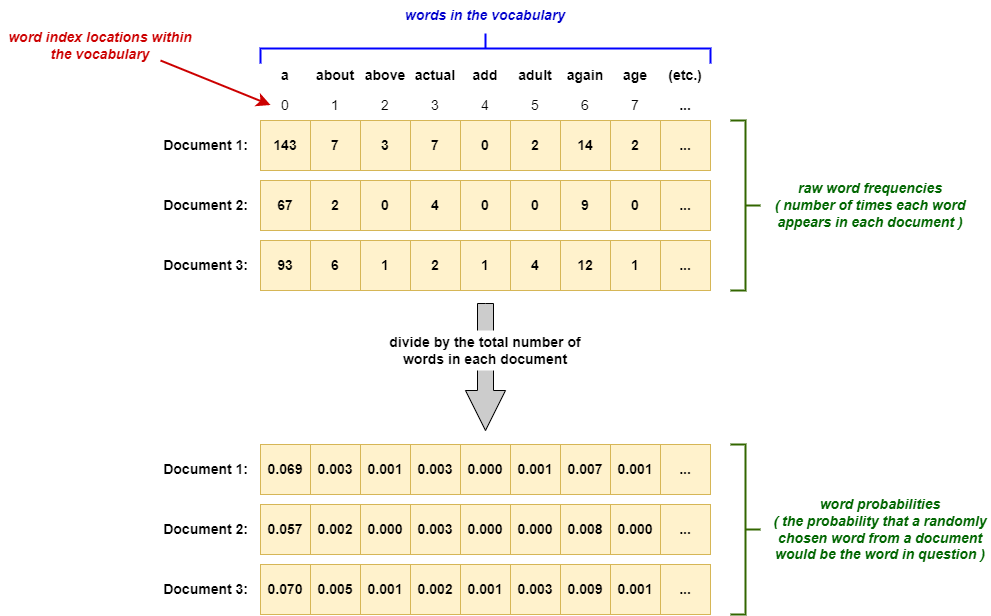

Run the code cell below to compute the word (unigram) probability distribution for each document. We'll use the `numpy` (numeric python) library for this purpose because it allows us to quickly and easily perform mathematical operations on vectors and matrices. If you review the very first code cell in this notebook, you'll see that we already imported `numpy` and that we assigned it the alias `np`. This allows us to refer to the numpy library as `np` in our code below. In this case, we'll be using `numpy` to quickly divide the number of times each vocabulary word appears in a document by the total number of words in that document, thus yielding a probability (or percentage) for each word.

In [46]:
#define a collection to hold the vocabulary word probabilities for each document
word_probabilities = []

#compute the vocabulary word probabilities for each document
for current_document in df_english.itertuples():
  word_probabilities.append(np.array(current_document.word_frequencies) / current_document.total_words)

#add the vocabulary word probabilities for each document to the dataframe as a new column
df_english['word_probabilities'] = word_probabilities

###Probability of a Word Within a Document
To find the probability of any specific word within a document, we first need to know the word's index location within the vocabulary. Since our vocabulary for this lab assignment is stored as a simple list, we can easily locate the index for a particular word by using the list's `index()` function.

Run the code cell below to find the index for the word *'the'* within the vocabulary.

In [47]:
#display the index location of the word 'the' within the vocabulary
word_index = vocabulary.index('the')
print('The word "the" is located at index location', word_index, 'in the vocabulary.')

The word "the" is located at index location 4551 in the vocabulary.


Once we know the index location for a particular word within the vocabulary, we can easily find the probability value for that word within any of the documents.

Run the code cell below to find the probability that any randomly chosen word in the first document in the `df_english` dataframe would be the word *'the'*. Note that you can use the `iloc` property to fetch a row from a dataframe at a specific index location.

In [48]:
#display the probability that any randomly chosen word in the first document would be the word 'the'
df_english.iloc[0].word_probabilities[word_index]

0.059388646288209605

###Average Probability of a Word
To find the average probability of a particular word within a collection of documents, we can simply take the average of the individual probabilities for that word within the collection.

Run the code cell below to find the average probability of the word *'species'* among all of the documents in the corpus.

In [49]:
#define a function that will return the average probability for the target word.
#If a topic is specified, results will be limited to documents with that topic.
def average_word_probability(target_word, topic=None):
  word_index = vocabulary.index(target_word) #get the index of the target word within the vocabulary
  probabilities = [] #a collection to store the probability of the target word in each document
  for current_document in df_english.itertuples():
    #if no topic was specified or if the topic of the current document matches the specified topic
    if topic == None or current_document.topic == topic:
      #store the probability of the target word for this document
      probabilities.append(current_document.word_probabilities[word_index])
  #return the average probability for the word across all documents in the corpus
  return np.mean(probabilities)


#display the average probability of the word 'species' among all documents in the corpus
target_word = 'species'
average_probability = average_word_probability(target_word)
print('The average probabilty of the word "{}" is: {}'.format(target_word, average_probability))

The average probabilty of the word "species" is: 0.0003779277323721303


The result above gives us an idea of the baseline probability of the word `species` within the corpus. Specifically, out of every 100,000 words, we would expect the word `species` to appear about 38 times. Equivalently, if we were to choose a word at random from our corpus, the probability of choosing the word `species` would be approximately 0.038%.

Whether we realize it or not, our brains automatically compute and store a baseline expectation such as the one above for every word in our vocabulary. Comparing these baseline word frequency expectations to what we're currently hearing or reading is one of the ways that we identify the topic of a conversation or the topic of a passage of text. For example, if we were reading about science, we would probably expect to see the word `species` more frequently than average. Let's test this idea.

Run the code cell below to find the average probability of the word `species` among all of the documents in the corpus whose topic is `Science`.

In [50]:
#display the average probability of the word 'species' among all 'Science' documents in the corpus
average_probability = average_word_probability(target_word, topic='Science')
print('The average probabilty of the word "{}" within Science documents is: {}'.format(target_word, average_probability))

The average probabilty of the word "species" within Science documents is: 0.0010248001639680262


As you can see, we're much likelier to see the word `species` in `Science` documents than average. In this specific case, out of every 100,000 words in documents whose topic is `Science`, we would expect to see the word `species` about 102 times. Thus, the probability of the word `species` appearing in `Science` documents is about 270% greater than the average frequency with which `species` appears in all of the documents in the corpus.

More generally, every topic can be distinguished from every other topic by the differences among their topic-specific word probability distributions. If we're talking about Paris, then we would expect concepts such as the Eiffel Tower, the Louvre, or the Champs-Élysées to be mentioned more frequently than average. Similarly, if we're talking about smartphones, then we would expect concepts such as apps, battery life, or 5G to be mentioned more frequently than average. The point is that humans -- and computers -- can identify the topic of a conversation or a passage of text based on how frequently different words are mentioned.

**TASK 08**:
>Write some code in the cell below that will display the average probability of the word `market` among:
1. All of the documents in the corpus whose topic is `Business`; and
2. All of the documents in the corpus whose topic is `Sports`.

**QUESTION 08**:
>Compared to documents whose topic is `Sports`, how much likelier is the word `market` to appear in documents whose topic is `Business`?
<ol type="a">
  <li>About 1.1 times likelier</li>
  <li>About 3.2 times likelier</li>
  <li>About 5.4 times likelier</li>
  <li>About 7.7 times likelier</li>
</ol>

In [52]:
#display the average probability of the word 'market' among all 'Business' documents in the corpus
target_word1 = 'market'

average_probability1 = average_word_probability(target_word1, topic='Business')
print('The average probabilty of the word "{}" within Business documents is: {}'.format(target_word1, average_probability1))

#display the average probability of the word 'market' among all 'Sports' documents in the corpus

average_probability2 = average_word_probability(target_word1, topic='Sports')
print('The average probabilty of the word "{}" within Sports documents is: {}'.format(target_word1, average_probability2))

#display the ratio of business to sports probabilties
ratio_business_to_sports = average_probability1 / average_probability2
print('The ratio of business to sports probabilities for the word "{}" is: {}'.format(target_word1, ratio_business_to_sports))

The average probabilty of the word "market" within Business documents is: 0.002516560423943954
The average probabilty of the word "market" within Sports documents is: 0.0003289120760693245
The ratio of business to sports probabilities for the word "market" is: 7.651164572666954


###Similarity Between Documents
What the experiments above reveal is that the topics discussed in a document can be identified by both humans and computers based on how frequently certain words appear in the document. Extending this idea a bit further, we might reasonably conclude that we could determine how similar the content of two documents is by comparing those documents' word probability distributions. For example, imagine that we had two documents that discussed ancient Egypt and a third document that discussed how to make chocolate ice cream. Intuitively, we would expect words such as *pharaoh*, *pyramid*, *hieroglyph*, etc. to have a much greater probability of appearing in the documents about ancient Egypt than in the document that discusses how to make chocolate ice cream. This suggests that a document's word probability distribution encodes useful information about the content of the document itself.

So, given two documents' word probability distributions, how might we measure their degree of similarity? As we'll learn in our class, there are many different ways of quantifying the degree of similarity between two text objects (such as two documents). One viable approach would be to measure the *distance* between the documents' word probability distributions. Intuitively, if the content of one document is very similar to the content of another document, then we might reasonably expect that their word probability distributions would also be very similar. Put differently, the two documents' word probability distributions would be *close* to one another.

Let's explore these ideas...

###Distance Between Vectors
One of the easiest ways of determining how similar documents are to each other is to measure the distance between their feature vectors. To do this, we simply need to think of each feature vector as defining a location in a multidimensional geometric space. If our vocabulary only contained three unique words, then this would be a three-dimensional space. Our vocabularly contains thousands of unique words, however, so our geometric space will contain thousands of dimensions (one dimension for each word in the vocabulary). This is not a problem, because the Euclidean distance formula applies to geometric spaces with as many dimensions as we need, even if we humans can only intuitively understand spaces that have one, two, or three dimensions. You can learn more about the Euclidean distance formula in [this article](https://en.wikipedia.org/wiki/Euclidean_distance).

The formula for calculating the Euclidean distance between any two points *p* and *q* in an *n*-dimensional space is:

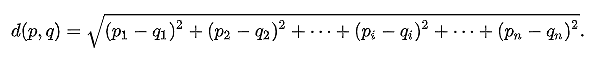

Run the code cell below to define a function that can compute the distance between any two points:

In [53]:
#define a function to compute the Euclidean distance between two points
#(where each point is defined as a vector)
def get_distance(point1, point2):
  return np.sqrt(np.sum(np.square(point1 - point2)))

Now that we have our `get_distance()` function, we can easily measure the distance between two documents. Smaller distance values indicate that the documents are closer to each other (and are hence more similar), while larger distance values indicate that the documents are farther away from each other (and are hence less similar). We can verify that things are working as we expect by checking the distance between two copies of the same document. Since the content in one copy of the document is identical to the content in the other copy of the document, the distance between them should be exactly `0.0`.

Run the code cell below to compute the distance between two copies of the document whose ID (Index) value is `12`:

In [54]:
#calculate the distance between two copies of document 12:
distance = get_distance(df_english.loc[12].word_probabilities, df_english.loc[12].word_probabilities)

#display the result
print('The distance between the two copies of Document 12 is:', distance)

The distance between the two copies of Document 12 is: 0.0



###Finding Similar Documents

In text mining, it's often very useful to be able to identify documents that are similar to each other. For example, we may want to identify redundant or duplicate documents in a large corpus, or we may want to search for documents that discuss particular topics, or we may want to automatically categorize or group documents together based on their content. A document similarity analysis could be usefully applied to all of these scenarios.

Returning to our lab assignment, let's see if we can find another document in our English-language corpus whose content is similar to that of Document `12`.

**TASK 09**:
>Write some code in the cell below that will identify the ID (Index) value of the document in the English-language corpus whose content is most similar to the content of Document `12` (i.e., the document that is closest to Document `12`). Some code has already been provided for you.

**QUESTION 09**:
>Which document in the English-language corpus has content that is most similar to Document `12`?
<ol type="a">
  <li>Document 10</li>
  <li>Document 15</li>
  <li>Document 20</li>
  <li>Document 25</li>
</ol>

In [57]:

# Get Document 12 and assign it to a 'target_document' variable
target_index = 12
target_document = df_english.loc[target_index].word_probabilities.reshape(1, -1)

# Initialize variables to store the most similar document index and the minimum distance
most_similar_index = None
min_distance = float('inf')  # Initialize with a large value

# Iterate over each document in the English-language corpus
for index, current_document in df_english.iterrows():
    # Calculate the distance between Document 12 and the current document
    distance = euclidean_distances(target_document, current_document.word_probabilities.reshape(1, -1))

    # Check if the current document is not Document 12 and if its distance is smaller than the minimum distance
    if index != target_index and distance < min_distance:
        min_distance = distance
        most_similar_index = index

# Print the index of the most similar document
print("Index of the most similar document:", most_similar_index)


Index of the most similar document: 15


###Validate Your Findings
Now that your Python program has identified the document whose content it believes is most similar to Document `12`, let's take a look at the documents to see if the results make sense to us as humans.

Write a line a code in the cell below that will display the raw text of the document that you identified in the previous task. Do the two documents appear to discuss the same general topic?

In [59]:
#print the raw text of Document 12
print(df_english.loc[12].raw_text, '\n')

print(df_english.loc[15].raw_text, '\n')

#print the raw text of the document whose content is most similar to Document 12


This year's NCAA Tournament set a new record for the number of wins by lower seeded teams in the first two rounds with 13. The previous record was 12 in 2021. There were also 11 upsets in the first two rounds of the 2022 tournament, so if you are detecting a trend, you are correct. Those are the three highest total number of upsets through two rounds in the 43 tournaments since seeding began in 1980. There have been only 12 tournaments with double-digit upsets in the first two rounds. Seven of those have come in the last nine tournaments. No. 15 seed Princeton moved on to the Sweet 16 with wins over Arizona and Missouri. This is the third consecutive year that a No. 15 seed has advanced this far. Saint Peter's got to the Elite Eight last season and is the only No. 15 seed to advance that far. Oral Roberts got to the Sweet 16 in 2021, while Dunk City – Florida Gulf Coast – was the first No. 15 seed to make the Sweet 16 in 2013. The Big Ten is having yet another difficult tournament. The

## End of Lab Assignment 02!